# WSI LAB04 Regresja i klasyfikacja

### Miłosz Cieśla 325154 <br>

## Cel eksperymentu 
- Sprawdzenie przewidywania wyników za pomocą tworzenia drzew decyzyjnych algorytmem ID3.
- Zbadanie wpływu parametru maksymalnej głębokości drzew na wyniki.
- Znalezienie najlepszej głębokości dla zbioru danych Cardio Vascular Disease Detection.
- Przetestowanie zachowania algorytmu dla niestandardowej liczby kolumn

## Decyzje projektowe
- Zdecydowałem się na wyliczanie "information gain" z pomocą entropii.
- Dyskretyzuje dane wyliczając część całkowitą z dzielenia:
    - Wiek // 365
    - Wzrost // 5
    - Waga // 5
    - Ciśnienie skurczowe // 2
    - Ciśnienie rozkurczowe // 2
- W przypadku za małej liczby kolumn zwracam własny wyjątek dla większej czytelności



## Eksperyment - sprawdzenie działania dla brakujących lub dodatkowych parametrów

W ramach tego eksperymentu, używam utworzonej przeze mnie funkcji 'checkAccuracy' która wykonuje operacje 'fit' w moim solverze, a następnie rozszerza bądź przycina dane w zależności od podanych mu parametrów, uruchamiając z nimi funkcję przewidywania.

### Potrzebne importy

In [1]:
from testingFunctions import readCSV, dataDiscretization, checkAccuracy
import pandas as pd
X, Y = readCSV("cardio_train.csv")
X = dataDiscretization(X)

Dla za małej liczby kolumn przy przewidywaniu moja funkcja zwraca wyjątek:

In [3]:
try:
    checkAccuracy(X, Y, 6, -1, 0)
except Exception as e:
    print(e)

Not enough columns passed as an argument


Dokładność wyników dla przewidywania z danymi posiadającymi zbyt dużą liczbę kolumn:

In [2]:
data = checkAccuracy(X, Y, 6, 0, 8)
columns = ["Accuracy(%)"]
df = pd.DataFrame(data, columns=columns)
df.index.name = 'Columns added'
df

,Accuracy(%)
Columns added,
0,73.603556
1,73.603556
2,73.603556
3,73.603556
4,73.603556
5,73.603556
6,73.603556
7,73.603556


Dla dowolnej liczby dodanych kolumn, możemy zauważyć taką samą dokładność. Wynika to z tego, że wszystkie nasze węzły warunkowe biorą pod uwagę tylko kolumny uwzględnione przy tworzeniu drzewa.

## Eksperyment - badanie wpływu maksymalnej głebokości drzew

W celu zbadania tego parametru, zdecydowałem się na uruchomienie 50 razy mySolver'a z różnymi wartościami wysokości drzewa używając zbioru testującego uzyskanego z funkcji train_test_split z biblioteki sckikit learn.
Dodatkowo dla porównania, również uruchamiam na tym samym wcześniej utworzonym drzewie przewidywanie dla zbioru walidacyjnego. 


### Potrzebne importy

In [2]:
from testingFunctions import getDepthAccuracy, pltAccuracy

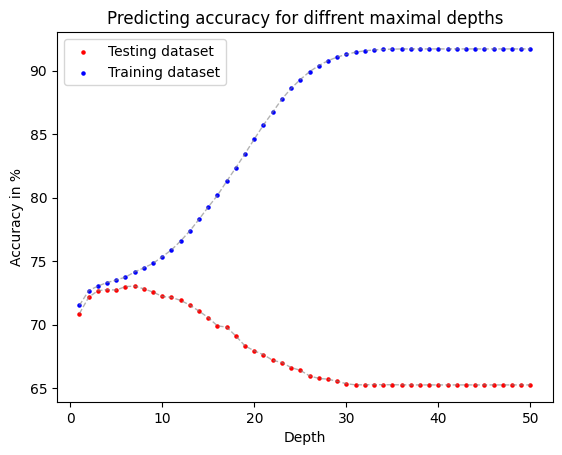

In [6]:
accuracyData = getDepthAccuracy(50, X, Y, 123456, True)
pltAccuracy(accuracyData)

# Wnioski

### Sprawdzenie poprawnego działania algorytmu

Zastosowanie zbioru trenującego użytego do utworzenia drzewa w funkcji przewidywania, pozwala nam sprawdzić czy algorytm działa poprawnie.
Z analizy wykresu, można w takim razie wywnioskować, poprawność mojej implementacji. Przy wysokiej głębi drzewa dokładność wyników zbliża się do 100%.

### Najlepsza wartość

Jak możemy zauważyć, dla wybranych przez nas danych funkcja osiąga najlepsze wartości w przedziale: <4,8>.
Poniżej depth=4 widzimy sytuacje under-fittingu natomiast powyżej 8 widzimy tendencję spadkową ponieważ zaczynamy szukać zależności tam gdzie ich nie ma.
Dla niektórych wartości wysokości drzewa miejscowo widzimy wzrosty, niestety nie oznaczają one poprawy stanu, dalej jest ono w sytuacji over-fittingu. Te przyrosty wynikają najprawdopodobniej z tego, że 'Node' warunkowy dodany w tej głębii znalazł poprawną zależność, dla niewielkiej grupy przypadków, lecz przy tworzeniu drzew o większej głębi zostaje to zatarte.


### Różnice w kierunkach wzrostu między zbiorami

Może budzić zainteresowanie fakt, dlaczego jedna z kolekcji wykazuje poprawę efektywności, podczas gdy druga wykazuje tendencję do pogorszenia się wraz z rosnącym współczynnikiem głębokości. Wynika to z tego, że przy zwiększeniu precyzji drzewo decyzyjne ID3, tworzy przypadki zależne całkowicie od zbioru na którym było trenowane, co oddala je od szerszej perspektywy która jest nam potrzebna do przewidywania.   